In [ ]:
import os
import requests

img_ids = []
with open ('/kaggle/input/vivqa-dataset/img_ids.txt') as f:
    for line in f:
        img_ids.append(line.strip())

os.makedirs('images', exist_ok=True)
train_url = 'http://images.cocodataset.org/train2017/'  
val_url = 'http://images.cocodataset.org/val2017/'

for img_id in img_ids:
    img_filename = '0'*(12-len(img_id)) + img_id + '.jpg'  # MS COCO typically uses 12-digit padded IDs for filenames
    response = requests.get(train_url + img_filename)
    if response.status_code == 200:
        with open(os.path.join('images', img_filename), 'wb') as f:
            f.write(response.content)
    else:
        response = requests.get(val_url + img_filename)
        if response.status_code==200:
            with open(os.path.join('images', img_filename), 'wb') as f:
                f.write(response.content)
        else:
            print(f'Failed to download image with ID {img_id}')

# Data analysis

In [1]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/vivqa-dataset/train.csv')
train_data

,Unnamed: 0,question,answer,img_id,type
0,0,màu của chiếc bình là gì,màu xanh lá,68857,2
1,1,màu của con mèo là gì,màu xám,119776,2
2,2,màu sắc của áo thun là gì,màu trắng,138621,2
3,3,màu của chăn là gì,màu tía,21138,2
4,4,màu của ngân hàng là gì,màu xanh lá,520551,2
...,...,...,...,...,...
11994,11994,có bao nhiêu người cố gắng chặn người khác đan...,một,492171,1
11995,11995,có bao nhiêu phụ nữ đang tạo dáng chụp ảnh tro...,hai,196378,1
11996,11996,có bao nhiêu thanh niên đối đầu với nhau trong...,hai,524063,1
11997,11997,có bao nhiêu cái bánh mì kẹp xúc xích đang ngồ...,hai,72955,1


In [2]:
train_data = train_data.drop(columns=['Unnamed: 0'])
train_data['answer'].nunique()

339

In [3]:
import re
ques_list = train_data['question'].tolist()
for ques in ques_list:
    if re.search(r"([.'!?\"()*#:;-])", ques):
        print(ques)

bốn quả cam, cà rốt; bưởi, cây trứng, măng tây và hành tây trên bàn nằm ở đâu
đâu là em bé được tặng một chiếc bánh sinh nhật với một ngọn nến `` 1 ''
phòng tắm có hai bồn rửa mặt ở đâu?
người đàn ông cạo một con cừu trắng ở đâu?
đồng hồ đỗ xe có chữ bị lỗi ở đâu?
xe tải pick-up sáng bóng ở đâu với sở cứu hỏa phù hiệu ngồi
cái gì đang nhìn xuống một cuốn sách. nó dường như đang đọc nó
những người đang cưỡi xuống một bãi biển bên cạnh nước là gì?
xe lửa màu cam kéo một đoàn tàu trong bãi chở hàng bằng gì?
những gì chứa đầy những chai cũ, một t.v. và đèn, và trang trí khác
những gì nằm bên cạnh tv mô hình cũ có logo `` youtube '' được gắn vào màn hình
xe buýt hai tầng ở edinburgh là gì, scotland; một tour du lịch
những gì được dán nhãn `` ngựa '' đang lái xe xuống đường vào giữa buổi chiều
những gì làm cho một loạt các xe máy xếp hàng?
cửa sổ nào phản chiếu các tòa nhà thành phố khác trong nền; phía trước có đèn giao thông
cậu bé ăn gì. bánh rán trông giống như sô cô la
những gì hiển thị

In [4]:
dict_map = {
    "òa": "oà",
    "Òa": "Oà",
    "ÒA": "OÀ",
    "óa": "oá",
    "Óa": "Oá",
    "ÓA": "OÁ",
    "ỏa": "oả",
    "Ỏa": "Oả",
    "ỎA": "OẢ",
    "õa": "oã",
    "Õa": "Oã",
    "ÕA": "OÃ",
    "ọa": "oạ",
    "Ọa": "Oạ",
    "ỌA": "OẠ",
    "òe": "oè",
    "Òe": "Oè",
    "ÒE": "OÈ",
    "óe": "oé",
    "Óe": "Oé",
    "ÓE": "OÉ",
    "ỏe": "oẻ",
    "Ỏe": "Oẻ",
    "ỎE": "OẺ",
    "õe": "oẽ",
    "Õe": "Oẽ",
    "ÕE": "OẼ",
    "ọe": "oẹ",
    "Ọe": "Oẹ",
    "ỌE": "OẸ",
    "ùy": "uỳ",
    "Ùy": "Uỳ",
    "ÙY": "UỲ",
    "úy": "uý",
    "Úy": "Uý",
    "ÚY": "UÝ",
    "ủy": "uỷ",
    "Ủy": "Uỷ",
    "ỦY": "UỶ",
    "ũy": "uỹ",
    "Ũy": "Uỹ",
    "ŨY": "UỸ",
    "ụy": "uỵ",
    "Ụy": "Uỵ",
    "ỤY": "UỴ",
    }

def replace_all(text, dict_map):
    for i, j in dict_map.items():
        text = text.replace(i, j)
    return text

train_data['question'] = train_data['question'].apply(lambda x: re.sub(r"([.'!?\"()*#:])", '', x.lower()).replace(";", ",").replace("-", " ").strip())
train_data['question'] = train_data['question'].apply(lambda x: replace_all(x, dict_map))

In [5]:
from nltk import wordpunct_tokenize
train_data['ques_len'] = train_data['question'].apply(lambda x: len(wordpunct_tokenize(x)))
train_data

,question,answer,img_id,type,ques_len
0,màu của chiếc bình là gì,màu xanh lá,68857,2,6
1,màu của con mèo là gì,màu xám,119776,2,6
2,màu sắc của áo thun là gì,màu trắng,138621,2,7
3,màu của chăn là gì,màu tía,21138,2,5
4,màu của ngân hàng là gì,màu xanh lá,520551,2,6
...,...,...,...,...,...
11994,có bao nhiêu người cố gắng chặn người khác đan...,một,492171,1,13
11995,có bao nhiêu phụ nữ đang tạo dáng chụp ảnh tro...,hai,196378,1,13
11996,có bao nhiêu thanh niên đối đầu với nhau trong...,hai,524063,1,15
11997,có bao nhiêu cái bánh mì kẹp xúc xích đang ngồ...,hai,72955,1,16


min_len=2, max_len=27


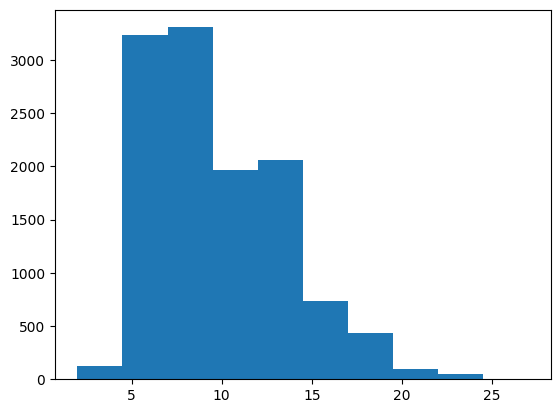

In [6]:
import matplotlib.pyplot as plt
plt.hist(train_data['ques_len'].values)
print(f"min_len={train_data['ques_len'].min()}, max_len={train_data['ques_len'].max()}")

Question: màu của tường là gì, Answer:màu đen


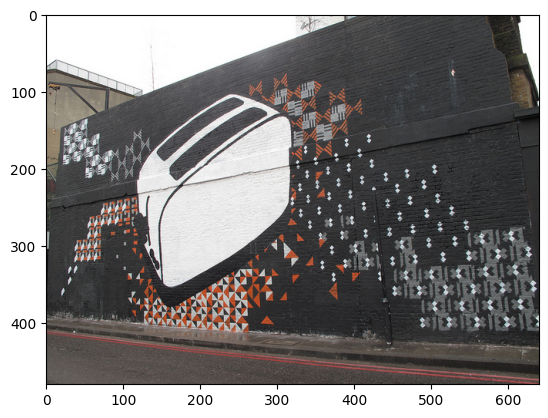

In [7]:
from PIL import Image
def show_example(id):
    row = train_data.loc[id]
    img_id, question, answer = row['img_id'], row['question'], row['answer']
    img = Image.open(f'/kaggle/input/coco-images/{img_id:012d}.jpg')
    plt.imshow(img)
    print(f'Question: {question}, Answer:{answer}')
show_example(100)

# Data preprocessing

In [8]:
from collections import Counter
import json
import numpy as np
questions = train_data['question'].tolist()

class Vocab(object):
    def __init__(self, word2id=None):
        if word2id:
            self.word2id = word2id
        else:
            self.word2id = dict()
            self.word2id['<pad>'] = 0   # Pad Token
            self.word2id['<unk>'] = 1   # Unknown Token
            self.unk_id = self.word2id['<unk>']
        
    def __getitem__(self, word):
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        return word in self.word2id

    def __setitem__(self, key, value):
        raise ValueError('vocabulary is readonly')

    def __len__(self):
        return len(self.word2id)

    def add(self, word):
        if word not in self:
            wid = self.word2id[word] = len(self)
            return wid
        else:
            return self[word]

    def words2indices(self, sents):
        try:
            if type(sents[0]) == list:
                return [[self[w] for w in s] for s in sents]
            else:
                return [[self[w] for w in sents]]
        except Exception as e:
            print(e, sents)
            return []
    
    @staticmethod
    def from_corpus(corpus, size, freq_cutoff=2, pretrained_read_path=None, emb_size=300): #corpus: list of sentences
        vocab = Vocab()
        corpus = [word for sent in corpus for word in wordpunct_tokenize(sent)]
        word_freq = Counter(corpus)
        valid_words = [w for w, v in word_freq.items() if v >= freq_cutoff]
        print('number of word types: {}, number of word types w/ frequency >= {}: {}'
              .format(len(word_freq), freq_cutoff, len(valid_words)))
        top_k_words = sorted(valid_words, key=lambda w: word_freq[w], reverse=True)[:size]
        pretrained_emb = []
        if pretrained_read_path:
            w2v = dict()
            with open(pretrained_read_path, 'r') as f:
                i = 0
                for line in f:
                    if i==0:
                        i+=1
                        continue
                    line = line.strip()
                    token = line.split(' ')[0]
                    if token in w2v:
                        continue
                    emb = line.split(' ')[1:]
                    w2v[token] = emb
                    i+=1
            pretrained_emb.append(np.zeros(emb_size).tolist()) #pad
            pretrained_emb.append(np.random.randn(emb_size).tolist()) #unk
            for word in top_k_words:
                vocab.add(word)
                pretrained_emb.append(w2v.get(word, np.random.randn(emb_size).tolist()))
            assert len(vocab)==len(pretrained_emb)
            pretrained_emb = np.array(pretrained_emb)
        else:
            for word in top_k_words:
                vocab.add(word)
        return vocab, pretrained_emb
    
    def save(self, file_path):
        with open(file_path, 'w') as f:
            json.dump(self.word2id, f, indent=2)
    
    @staticmethod
    def load(file_path):
        word2id= json.load(open(file_path, 'r'))
        return Vocab(word2id)

In [9]:
vocab, _ = Vocab.from_corpus(questions, 5000, 1)
pretrained_emb = np.load('word2vec.npy').astype(np.float32)
print(len(vocab))
print(pretrained_emb.shape)

number of word types: 2225, number of word types w/ frequency >= 1: 2225
2227
(2227, 300)


In [10]:
def create_label(answers, num_labels=1000):
    ans_freq = Counter(answers)
    top_k_ans = sorted(ans_freq, key=lambda ans: ans_freq[ans], reverse=True)[:(num_labels-1)]
    
    label2ans = dict()
    ans2label = dict()
    label2ans[0] = 'unk'
    ans2label['unk'] = 0
    
    for i, ans in enumerate(top_k_ans):
        ans2label[ans] = i+1
        label2ans[i+1] = ans
    return label2ans, ans2label

label2ans, ans2label = create_label(train_data['answer'].tolist())

In [11]:
len(ans2label)

340

In [12]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os

class VqaDataset(Dataset):
    def __init__(self, ques_path, vocab, ans2label, resize=(224, 224), image_dir='/kaggle/input/coco-images', ques_max_len=32):
        self.df = pd.read_csv(ques_path)
        self.vocab = vocab
        self.ans2label = ans2label
        self.transforms = transforms.Compose([
            transforms.Resize(resize), 
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.image_dir = image_dir
        self.ques_max_len = ques_max_len
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        question = self.df.iloc[idx]['question']
        img_id = self.df.iloc[idx]['img_id']
        answer = self.df.iloc[idx]['answer']
        
        label = torch.tensor(self.ans2label.get(answer, self.ans2label['unk']))
        input_ids = torch.full((self.ques_max_len, 1), self.vocab['<pad>']).squeeze()
        ques_tokens = wordpunct_tokenize(question)
        input_ids[:len(ques_tokens)] = torch.tensor([self.vocab[word] for word in ques_tokens])
     
        image = Image.open(os.path.join(self.image_dir, f'{img_id:012d}.jpg')).convert('RGB')
        image_tensor = self.transforms(image)
                             
        return {
            'input_ids': input_ids,
            'image_tensor': image_tensor,
            'label': label
        }
        

# Model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
class ImageEncoder(nn.Module):
    def __init__(self, output_size=1024):
        super(ImageEncoder, self).__init__()
        self.cnn = models.vgg11(pretrained=True).features
        for param in self.cnn.parameters():
            param.requires_grad = False
        self.fc = nn.Sequential(
            nn.Linear(512, output_size),
            nn.Tanh()
        )
    
    def forward(self, image):
        image = self.cnn(image)   # (batch,3,448,448) -> (batch,512,14,14) 
        image = image.reshape(image.shape[0],512,196).transpose(1,2) # -> (batch,196,512)
        image_embed = self.fc(image) # -> (batch,196,output_size)
        return image_embed
    
class QuestionEncoder(nn.Module):
    def __init__(self, vocab_size, embed_size=300, pretrained_emb=None, hidden_size=1024):
        super(QuestionEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        if pretrained_emb is not None:
            self.embedding.from_pretrained(torch.from_numpy(pretrained_emb))
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=1, batch_first=True)
    def forward(self, question):
        embeds = self.embedding(question) # (batch, seq_len, embed_size)
        _, (hidden, _) = self.lstm(embeds) #last hidden: (1, batch, hidden_size)
        question_embed = hidden[0] #(batch, hidden_size)
        return question_embed

class Attention(nn.Module):
    def __init__(self, d=1024, k=512):
        super(Attention, self).__init__()
        self.fc_image = nn.Linear(d, k)
        self.fc_question = nn.Linear(d, k)
        self.fc_attention = nn.Linear(k, 1)
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, vi, vq): #vi: (batch, 196, d), vq: (batch, d)
        hi = self.fc_image(vi) #(batch, 196, k)
        hq = self.fc_question(vq).unsqueeze(1) #(batch, 1, k)
        ha = F.tanh(hi+hq)
        ha = self.dropout(ha)
        ha = self.fc_attention(ha).squeeze(2) #(batch, 196)
        pi = F.softmax(ha, dim=1) # (batch, 196)
        vi_attended = (pi.unsqueeze(2) * vi).sum(dim=1)   #(batch, 196, 1) * (batch, 196, d) -> (batch, 196, d) -> (batch, d)
        u = vi_attended + vq #(batch, d)
        return u

class SANModel(nn.Module):
    def __init__(self, vocab_size, emb_size=300, pretrained_emb=None, d=1024, k=512, ans_vocab_size=1000,
                 num_att_layers=1):
        super(SANModel, self).__init__()
        self.image_encoder = ImageEncoder(d)
        self.question_encoder = QuestionEncoder(vocab_size, emb_size, pretrained_emb, d)
        self.san = nn.ModuleList(
            [Attention(d, k)] * num_att_layers)

        self.mlp = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(d, ans_vocab_size))

    def forward(self, image, question):
        vi = self.image_encoder(image)
        vq = self.question_encoder(question)
        for att_layer in self.san:
            vq = att_layer(vi, vq)  #(batch, d)
        output = self.mlp(vq)    #(batch, ans_vocab_size)
        return output

# Training

In [14]:
from tqdm import tqdm
from torch.cuda.amp import GradScaler, autocast
import time

def train(model, dataloader, loss_fn, optimizer, scaler, device='cpu'):
    start_time = time.time()
    model.train()
    
    loss_l = []
    acc_l = []
    
    for batch in tqdm(dataloader):
        question = batch['input_ids'].to(device)
        image = batch['image_tensor'].to(device)
        label = batch['label'].to(device)
        
        optimizer.zero_grad()
        with autocast():
            logits = model(image, question)
            loss = loss_fn(logits, label)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        loss_l.append(loss.item())
        acc = (logits.argmax(1)==label).float().mean()
        acc_l.append(acc.item())
    print(f'Train loss: {np.mean(loss_l):.4f} | Train acc: {np.mean(acc_l):.4f} | Time: {time.time() - start_time:.2f}s')
    return np.mean(loss_l), np.mean(acc_l)

def val(model, dataloader, loss_fn, sdevice='cpu'):
    start_time = time.time()
    model.eval()
    
    loss_l = []
    acc_l = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader):
            question = batch['input_ids'].to(device)
            image = batch['image_tensor'].to(device)
            label = batch['label'].to(device)

            logits = model(image, question)
            loss = loss_fn(logits, label)

            loss_l.append(loss.item())
            acc = (logits.argmax(1)==label).float().mean()
            acc_l.append(acc.item())
    print(f'Eval loss: {np.mean(loss_l):.4f} | Eval acc: {np.mean(acc_l):.4f} | Time: {time.time() - start_time:.2f}s')
    return np.mean(loss_l), np.mean(acc_l)

In [22]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np

num_epochs = 30
batch_size = 32
lr = 0.005

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
scaler = GradScaler()
model = SANModel(vocab_size=len(vocab), ans_vocab_size=len(ans2label), pretrained_emb=pretrained_emb).to(device)
#if torch.cuda.device_count() > 1:
#    model = torch.nn.DataParallel(model)
train_dataset = VqaDataset('/kaggle/input/vivqa-dataset/train.csv', vocab, ans2label, resize=(448, 448), ques_max_len=27)
eval_dataset = VqaDataset('/kaggle/input/vivqa-dataset/test.csv', vocab, ans2label, resize= (448, 448), ques_max_len=27)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=10, gamma=0.2)

start_epoch = 0
best_acc = 0
train_loss_l = []
eval_loss_l = []
for epoch in range(start_epoch, num_epochs):
    print(f"{'='*10} Epoch: {epoch}/{num_epochs} {'='*10}")
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, scaler, device)
    eval_loss, eval_acc = val(model, eval_loader, loss_fn, device)
    scheduler.step()
    if eval_acc > best_acc:
        best_acc = eval_acc
        checkpoint = {
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scaler_state_dict': scaler.state_dict,
            'scheduler_state_dict': scheduler.state_dict(),
            'best_acc': best_acc,
            'epoch': epoch
        }
        torch.save(checkpoint, 'experiments/best_SAN_model_checkpoint.pth')
        print('Save best model')
    train_loss_l.append(train_loss)
    eval_loss_l.append(eval_loss) 

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:03<00:00, 148MB/s]  


========== Epoch: 0/30 ==========


100%|██████████| 375/375 [04:54<00:00,  1.28it/s]


Train loss: 4.3034 | Train acc: 0.1555 | Time: 294.05s


100%|██████████| 94/94 [01:16<00:00,  1.23it/s]


Eval loss: 3.0171 | Eval acc: 0.3069 | Time: 76.43s
Save best model
========== Epoch: 1/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 2.9122 | Train acc: 0.3270 | Time: 198.48s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.7070 | Eval acc: 0.3739 | Time: 62.30s
Save best model
========== Epoch: 2/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 2.4773 | Train acc: 0.3971 | Time: 199.60s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.5819 | Eval acc: 0.4060 | Time: 62.51s
Save best model
========== Epoch: 3/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 2.2469 | Train acc: 0.4289 | Time: 198.37s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.5156 | Eval acc: 0.4368 | Time: 62.41s
Save best model
========== Epoch: 4/30 ==========


100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train loss: 2.0940 | Train acc: 0.4605 | Time: 197.19s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.7018 | Eval acc: 0.4141 | Time: 62.51s
========== Epoch: 5/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 2.0967 | Train acc: 0.4644 | Time: 198.16s


100%|██████████| 94/94 [01:01<00:00,  1.52it/s]


Eval loss: 2.6304 | Eval acc: 0.4546 | Time: 61.89s
Save best model
========== Epoch: 6/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 1.8582 | Train acc: 0.5064 | Time: 198.65s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.4609 | Eval acc: 0.4747 | Time: 62.64s
Save best model
========== Epoch: 7/30 ==========


100%|██████████| 375/375 [03:21<00:00,  1.86it/s]


Train loss: 1.8016 | Train acc: 0.5204 | Time: 201.91s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.6143 | Eval acc: 0.4664 | Time: 62.81s
========== Epoch: 8/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 1.7086 | Train acc: 0.5364 | Time: 199.44s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.5914 | Eval acc: 0.4640 | Time: 62.17s
========== Epoch: 9/30 ==========


100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train loss: 1.6983 | Train acc: 0.5478 | Time: 197.63s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.5854 | Eval acc: 0.4662 | Time: 62.22s
========== Epoch: 10/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 1.0931 | Train acc: 0.6656 | Time: 199.65s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.3493 | Eval acc: 0.5178 | Time: 62.42s
Save best model
========== Epoch: 11/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.9154 | Train acc: 0.7090 | Time: 199.41s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.3363 | Eval acc: 0.5211 | Time: 62.34s
Save best model
========== Epoch: 12/30 ==========


100%|██████████| 375/375 [03:20<00:00,  1.87it/s]


Train loss: 0.8292 | Train acc: 0.7312 | Time: 200.89s


100%|██████████| 94/94 [01:03<00:00,  1.48it/s]


Eval loss: 2.3177 | Eval acc: 0.5265 | Time: 63.37s
Save best model
========== Epoch: 13/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.7749 | Train acc: 0.7463 | Time: 199.79s


100%|██████████| 94/94 [01:03<00:00,  1.48it/s]


Eval loss: 2.2902 | Eval acc: 0.5289 | Time: 63.36s
Save best model
========== Epoch: 14/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.7412 | Train acc: 0.7511 | Time: 199.08s


100%|██████████| 94/94 [01:03<00:00,  1.49it/s]


Eval loss: 2.3380 | Eval acc: 0.5180 | Time: 63.04s
========== Epoch: 15/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.7017 | Train acc: 0.7693 | Time: 199.92s


100%|██████████| 94/94 [01:03<00:00,  1.49it/s]


Eval loss: 2.3048 | Eval acc: 0.5325 | Time: 63.21s
Save best model
========== Epoch: 16/30 ==========


100%|██████████| 375/375 [03:20<00:00,  1.87it/s]


Train loss: 0.7038 | Train acc: 0.7675 | Time: 200.19s


100%|██████████| 94/94 [01:01<00:00,  1.52it/s]


Eval loss: 2.3389 | Eval acc: 0.5323 | Time: 61.91s
========== Epoch: 17/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.6576 | Train acc: 0.7817 | Time: 198.36s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.3592 | Eval acc: 0.5315 | Time: 62.55s
========== Epoch: 18/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.6222 | Train acc: 0.7929 | Time: 198.86s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.3634 | Eval acc: 0.5295 | Time: 62.21s
========== Epoch: 19/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.6028 | Train acc: 0.7962 | Time: 199.17s


100%|██████████| 94/94 [01:01<00:00,  1.52it/s]


Eval loss: 2.3661 | Eval acc: 0.5316 | Time: 61.96s
========== Epoch: 20/30 ==========


100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train loss: 0.5187 | Train acc: 0.8280 | Time: 197.07s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.3445 | Eval acc: 0.5404 | Time: 62.47s
Save best model
========== Epoch: 21/30 ==========


100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train loss: 0.4860 | Train acc: 0.8407 | Time: 197.01s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.3461 | Eval acc: 0.5411 | Time: 62.39s
Save best model
========== Epoch: 22/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.4706 | Train acc: 0.8383 | Time: 198.29s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.3463 | Eval acc: 0.5424 | Time: 62.64s
Save best model
========== Epoch: 23/30 ==========


100%|██████████| 375/375 [03:20<00:00,  1.87it/s]


Train loss: 0.4538 | Train acc: 0.8510 | Time: 200.19s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]


Eval loss: 2.3473 | Eval acc: 0.5432 | Time: 62.22s
Save best model
========== Epoch: 24/30 ==========


100%|██████████| 375/375 [03:19<00:00,  1.88it/s]


Train loss: 0.4563 | Train acc: 0.8519 | Time: 199.37s


100%|██████████| 94/94 [01:03<00:00,  1.49it/s]


Eval loss: 2.3477 | Eval acc: 0.5424 | Time: 63.26s
========== Epoch: 25/30 ==========


100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train loss: 0.4411 | Train acc: 0.8544 | Time: 197.54s


100%|██████████| 94/94 [01:02<00:00,  1.49it/s]


Eval loss: 2.3611 | Eval acc: 0.5425 | Time: 62.92s
========== Epoch: 26/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.4300 | Train acc: 0.8574 | Time: 198.61s


100%|██████████| 94/94 [01:02<00:00,  1.49it/s]


Eval loss: 2.3606 | Eval acc: 0.5445 | Time: 62.96s
Save best model
========== Epoch: 27/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.4232 | Train acc: 0.8607 | Time: 198.39s


100%|██████████| 94/94 [01:02<00:00,  1.49it/s]


Eval loss: 2.3700 | Eval acc: 0.5418 | Time: 62.90s
========== Epoch: 28/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.4162 | Train acc: 0.8601 | Time: 198.85s


100%|██████████| 94/94 [01:02<00:00,  1.50it/s]


Eval loss: 2.3684 | Eval acc: 0.5424 | Time: 62.78s
========== Epoch: 29/30 ==========


100%|██████████| 375/375 [03:18<00:00,  1.89it/s]


Train loss: 0.4079 | Train acc: 0.8671 | Time: 198.38s


100%|██████████| 94/94 [01:02<00:00,  1.51it/s]

Eval loss: 2.3709 | Eval acc: 0.5434 | Time: 62.19s


In [3]:
import torch
checkpoint = torch.load('experiments/best_SAN_model_checkpoint.pth', map_location=torch.device('cpu'))
print(checkpoint['epoch'])

26


# MCAN net

In [83]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAtt(nn.Module):
    def __init__(self, hidden_size, num_heads=8, dropout=0.1):
        super(MultiHeadAtt, self).__init__()
        self.d = hidden_size
        self.h = num_heads
        self.dh = hidden_size//num_heads
        self.linear_v = nn.Linear(hidden_size, hidden_size)
        self.linear_k = nn.Linear(hidden_size, hidden_size)
        self.linear_q = nn.Linear(hidden_size, hidden_size)
        self.linear_o = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(dropout)
    def att(self, v, k, q, mask):
        # v, k, q: (batch, h, seq_len, dh)
        # mask: (batch, 1, 1, seq_len)
        scores = q @ k.transpose(-2, -1) / math.sqrt(q.shape[-1])  #(batch, h, seq_len, seq_len)
        if mask is not None:
            scores = scores.masked_fill(mask, -1e4)
        att_map = F.softmax(scores, dim=-1) #(batch, h, seq_len, seq_len)
        att_map = self.dropout(att_map)
        return att_map @ v # (batch, h, seq_len, dh)
        
    def forward(self, v, k, q, mask):
        #v, k, q: (batch, seq_len, d)
        n_batches = q.shape[0]
        v = self.linear_v(v).reshape(n_batches, -1, self.h, self.dh).transpose(1, 2) #(batch, h, seq_len, dh)
        k = self.linear_k(k).reshape(n_batches, -1, self.h, self.dh).transpose(1, 2) #(batch, h, seq_len, dh)
        q = self.linear_q(q).reshape(n_batches, -1, self.h, self.dh).transpose(1, 2) #(batch, h, seq_len, dh)
        
        attend = self.att(v, k, q, mask) #(batch, h, seq_len, dh)
        attend = attend.transpose(1, 2).reshape(n_batches, -1, self.d) #(batch, seq_len, d)
        return self.linear_o(attend) #(batch, seq_len, d)

class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout=0.1):
        super(FeedForward, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, x):
        return self.model(x)
    
class SA(nn.Module):
    def __init__(self, hidden_size, ff_size, num_heads=8, dropout=0.1):
        super(SA, self).__init__()
        self.multiHeadAtt = MultiHeadAtt(hidden_size, num_heads, dropout)
        self.ff = FeedForward(hidden_size, ff_size, hidden_size)
        self.norm1 = nn.LayerNorm(hidden_size)
        self.norm2 = nn.LayerNorm(hidden_size)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
    def forward(self, x, mask):
        # x: (batch, seq_len, d)
        x = self.norm1(x + self.dropout1(self.multiHeadAtt(x, x, x, mask)))
        x = self.norm2(x + self.dropout2(self.ff(x)))
        return x #(batch, seq_len, d)
    
class SGA(nn.Module):
    def __init__(self, hidden_size, ff_size, num_heads=8, dropout=0.1):
        super(SGA, self).__init__()
        self.multiHeadAtt1 = MultiHeadAtt(hidden_size, num_heads, dropout)
        self.multiHeadAtt2 = MultiHeadAtt(hidden_size, num_heads, dropout)
        self.ff = FeedForward(hidden_size, ff_size, hidden_size)
        self.norm1 = nn.LayerNorm(hidden_size)
        self.norm2 = nn.LayerNorm(hidden_size)
        self.norm3 = nn.LayerNorm(hidden_size)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)
        
    def forward(self, x, y, x_mask, y_mask):
        # x, y: (batch, seq_len, d)
        # x self attends x then x queries y
        x = self.norm1(x + self.dropout1(self.multiHeadAtt1(x, x, x, x_mask)))
        x = self.norm2(x + self.dropout2(self.multiHeadAtt2(y, y, x, y_mask)))
        x = self.norm3(x + self.dropout3(self.ff(x)))
        return x #(batch, seq_len, d)
    
class MCA(nn.Module):
    def __init__(self, num_layers=2, hidden_size=512, ff_size=2048, num_heads=8, dropout=0.1):
        super(MCA, self).__init__()
        self.enc_l = nn.ModuleList([SA(hidden_size, ff_size, num_heads, dropout) for _ in range(num_layers)])
        self.dec_l = nn.ModuleList([SGA(hidden_size, ff_size, num_heads, dropout) for _ in range(num_layers)])
    def forward(self, x, y, x_mask, y_mask):
        # x, y: (batch, seq_len, d)
        # x: image, y: question
        for enc in self.enc_l:
            y = enc(y, y_mask)
        for dec in self.dec_l:
            x = dec(x, y, x_mask, y_mask)
        return x, y

In [84]:
class AttFlat(nn.Module):
    def __init__(self, hidden_size=512, fuse_size=1024, dropout=0.1):
        super(AttFlat, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 1)
        )
        self.proj = nn.Linear(hidden_size, fuse_size)
    def forward(self, x, x_mask):
        #x: (batch, seq_len, d)
        #x_mask: (batch, 1, 1, seq_len)
        att = self.mlp(x) #(batch, seq_len, 1)
        att = att.masked_fill(x_mask.squeeze(1).squeeze(1).unsqueeze(2), -1e4)
        att = F.softmax(att, dim=1) #(batch, seq_len, 1)
        x = att.transpose(1, 2) @ x #(batch, 1, d)
        return self.proj(x.squeeze(1)) #(batch, fuse_size)
        
class MCANet(nn.Module):
    def __init__(self, vocab_size, ans_vocab_size, emb_size=300, pretrained_emb=None, img_feat_size = 2048, 
                 num_MCA_layers=2, hidden_size=512, ff_size=2048, num_heads=8, dropout=0.1, fuse_size = 1024):
        super(MCANet, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size, padding_idx=0)
        if pretrained_emb is not None:
            self.embedding.from_pretrained(torch.from_numpy(pretrained_emb))
        self.lstm = nn.LSTM(emb_size, hidden_size, num_layers=1, batch_first=True)
        self.img_linear = nn.Linear(img_feat_size, hidden_size)
        self.mca = MCA(num_MCA_layers, hidden_size, ff_size, num_heads, dropout)
        self.attFlat_img = AttFlat(hidden_size, fuse_size)
        self.attFlat_ques = AttFlat(hidden_size, fuse_size)
        self.norm = nn.LayerNorm(fuse_size)
        self.classifier = nn.Linear(fuse_size, ans_vocab_size)
    def forward(self, img, ques):
        # img: (batch, seq_len, img_feat_size)
        # ques: (batch, seq_len)
        img_mask = self.create_mask(img)
        ques_mask = self.create_mask(ques.unsqueeze(2))
        img_feat = self.img_linear(img) #(batch, seq_len, hidden_size)
        ques_feat,_ = self.lstm(self.embedding(ques)) #(batch, seq_len, hidden_size)
        img_feat, ques_feat = self.mca(img_feat, ques_feat, img_mask, ques_mask) #(batch, seq_len, hidden_size)
        img_feat = self.attFlat_img(img_feat, img_mask) #(batch, fuse_size)
        ques_feat = self.attFlat_ques(ques_feat, ques_mask) #(batch, fuse_size)
        z = self.norm(img_feat + ques_feat) #(batch, fuse_size)
        return torch.sigmoid(self.classifier(z)) #(batch, ans_vocab_size)
    
    def create_mask(self, feature):
        return (torch.sum(torch.abs(feature), dim=-1)==0).unsqueeze(1).unsqueeze(2) #(batch, 1, 1, seq_len)

In [ ]:
import torch
from torch.utils.data import Dataset
import os
import glob

class VqaDataset(Dataset):
    def __init__(self, ques_path, vocab, ans2label, img_feat_path='/kaggle/input/coco-features/coco_features/', ques_max_len=27, img_max_len=100):
        self.df = pd.read_csv(ques_path)
        self.vocab = vocab
        self.ans2label = ans2label
        self.ques_max_len = ques_max_len
        self.img_max_len = img_max_len
        
        self.img_feats = dict()
        feat_path_list = glob.glob(img_feat_path + '*.npz')
        for feat_path in feat_path_list:
            img_id = feat_path.split('/')[-1].split('.')[0].split('_')[-1]
            self.img_feats[img_id] = np.load(feat_path)['x'].transpose(1, 0)
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        question = self.df.iloc[idx]['question']
        img_id = self.df.iloc[idx]['img_id']
        answer = self.df.iloc[idx]['answer']
        
        label = torch.tensor(self.ans2label.get(answer, self.ans2label['unk']))
        input_ids = torch.full((self.ques_max_len, 1), self.vocab['<pad>']).squeeze()
        ques_tokens = wordpunct_tokenize(question)
        input_ids[:len(ques_tokens)] = torch.tensor([self.vocab[word] for word in ques_tokens])
     
        img_feat = self.img_feats[f'{img_id:012d}']
        if img_feat.shape[0] > self.img_max_len:
            img_feat = img_feat[:self.img_max_len]
        img_feat = np.pad(img_feat, ((0, self.img_max_len - img_feat.shape[0]), (0, 0)), mode='constant', constant_values=0)
        image_tensor = torch.from_numpy(img_feat)  
                             
        return {
            'input_ids': input_ids,  #(ques_max_len)
            'image_tensor': image_tensor,#(img_max_len, img_feat_size)
            'label': label   
        }
        

In [ ]:
train_dataset = VqaDataset('/kaggle/input/vivqa-dataset/train.csv', vocab, ans2label)
eval_dataset = VqaDataset('/kaggle/input/vivqa-dataset/test.csv', vocab, ans2label)

In [85]:
from tqdm import tqdm
from torch.cuda.amp import GradScaler, autocast
import time

def train(model, dataloader, loss_fn, optimizer, scaler, device='cpu'):
    start_time = time.time()
    model.train()
    
    loss_l = []
    acc_l = []
    
    for batch in tqdm(dataloader):
        question = batch['input_ids'].to(device)
        image = batch['image_tensor'].to(device)
        label = batch['label'].to(device)
        
        optimizer.zero_grad()
        with autocast():
            logits = model(image, question)
            loss = loss_fn(logits, label)
            loss_l.append(loss.item())
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (logits.argmax(1)==label).float().mean()
        acc_l.append(acc.item())
    print(f'Train loss: {np.mean(loss_l):.4f} | Train acc: {np.mean(acc_l):.4f} | Time: {time.time() - start_time:.2f}s')
    return np.mean(loss_l), np.mean(acc_l)

def val(model, dataloader, loss_fn, sdevice='cpu'):
    start_time = time.time()
    model.eval()
    
    loss_l = []
    acc_l = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader):
            question = batch['input_ids'].to(device)
            image = batch['image_tensor'].to(device)
            label = batch['label'].to(device)

            logits = model(image, question)
            loss = loss_fn(logits, label)

            loss_l.append(loss.item())
            acc = (logits.argmax(1)==label).float().mean()
            acc_l.append(acc.item())
    print(f'Eval loss: {np.mean(loss_l):.4f} | Eval acc: {np.mean(acc_l):.4f} | Time: {time.time() - start_time:.2f}s')
    return np.mean(loss_l), np.mean(acc_l)

In [93]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, LinearLR, SequentialLR
import numpy as np

num_epochs = 20
batch_size = 32
lr = 0.0001
warmup_epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
scaler = GradScaler()
model = MCANet(vocab_size=len(vocab), ans_vocab_size=len(ans2label), pretrained_emb=pretrained_emb).to(device)
#if torch.cuda.device_count() > 1:
#    model = torch.nn.DataParallel(model)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr)
warmup_scheduler = LinearLR(optimizer, start_factor=0.25, total_iters=warmup_epochs)
main_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
scheduler = SequentialLR(optimizer, schedulers=[warmup_scheduler, main_scheduler], milestones=[warmup_epochs])

start_epoch = 0
best_acc = 0
train_loss_l = []
eval_loss_l = []
for epoch in range(start_epoch, num_epochs):
    print(f"{'='*10} Epoch: {epoch}/{num_epochs} {'='*10}")
    train_loss, train_acc = train(model, train_loader, loss_fn, optimizer, scaler, device)
    eval_loss, eval_acc = val(model, eval_loader, loss_fn, device)
    scheduler.step()
    if eval_acc > best_acc:
        best_acc = eval_acc
        checkpoint = {
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'scaler_state_dict': scaler.state_dict(),
            'best_acc': best_acc,
            'epoch': epoch
        }
        torch.save(checkpoint, 'experiments/best_MCA_model_checkpoint.pth')
        print('Save best model')
    train_loss_l.append(train_loss)
    eval_loss_l.append(eval_loss) 

========== Epoch: 0/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.42it/s]


Train loss: 5.3128 | Train acc: 0.2444 | Time: 24.33s


100%|██████████| 94/94 [00:04<00:00, 22.57it/s]


Eval loss: 5.1628 | Eval acc: 0.3508 | Time: 4.17s
Save best model
========== Epoch: 1/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.52it/s]


Train loss: 5.0751 | Train acc: 0.4019 | Time: 24.16s


100%|██████████| 94/94 [00:04<00:00, 22.64it/s]


Eval loss: 5.0347 | Eval acc: 0.4171 | Time: 4.16s
Save best model
========== Epoch: 2/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.45it/s]


Train loss: 4.9878 | Train acc: 0.4476 | Time: 24.28s


100%|██████████| 94/94 [00:04<00:00, 22.46it/s]


Eval loss: 4.9902 | Eval acc: 0.4295 | Time: 4.19s
Save best model
========== Epoch: 3/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.44it/s]


Train loss: 4.9438 | Train acc: 0.4681 | Time: 24.29s


100%|██████████| 94/94 [00:04<00:00, 22.35it/s]


Eval loss: 4.9750 | Eval acc: 0.4258 | Time: 4.21s
========== Epoch: 4/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.47it/s]


Train loss: 4.9142 | Train acc: 0.4967 | Time: 24.24s


100%|██████████| 94/94 [00:04<00:00, 22.25it/s]


Eval loss: 4.9678 | Eval acc: 0.4308 | Time: 4.23s
Save best model
========== Epoch: 5/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.61it/s]


Train loss: 4.8968 | Train acc: 0.5229 | Time: 24.03s


100%|██████████| 94/94 [00:04<00:00, 22.08it/s]


Eval loss: 4.9644 | Eval acc: 0.4605 | Time: 4.26s
Save best model
========== Epoch: 6/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.56it/s]


Train loss: 4.8855 | Train acc: 0.5425 | Time: 24.10s


100%|██████████| 94/94 [00:04<00:00, 22.43it/s]


Eval loss: 4.9664 | Eval acc: 0.4564 | Time: 4.20s
========== Epoch: 7/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.51it/s]


Train loss: 4.8793 | Train acc: 0.5485 | Time: 24.18s


100%|██████████| 94/94 [00:04<00:00, 22.32it/s]


Eval loss: 4.9623 | Eval acc: 0.4623 | Time: 4.21s
Save best model
========== Epoch: 8/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.41it/s]


Train loss: 4.8741 | Train acc: 0.5574 | Time: 24.34s


100%|██████████| 94/94 [00:04<00:00, 22.67it/s]


Eval loss: 4.9627 | Eval acc: 0.4673 | Time: 4.15s
Save best model
========== Epoch: 9/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.54it/s]


Train loss: 4.8701 | Train acc: 0.5724 | Time: 24.13s


100%|██████████| 94/94 [00:04<00:00, 22.16it/s]


Eval loss: 4.9739 | Eval acc: 0.4667 | Time: 4.25s
========== Epoch: 10/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.52it/s]


Train loss: 4.8711 | Train acc: 0.5381 | Time: 24.16s


100%|██████████| 94/94 [00:04<00:00, 22.11it/s]


Eval loss: 4.9708 | Eval acc: 0.4453 | Time: 4.26s
========== Epoch: 11/20 ==========


100%|██████████| 375/375 [00:23<00:00, 15.63it/s]


Train loss: 4.8686 | Train acc: 0.5581 | Time: 24.00s


100%|██████████| 94/94 [00:04<00:00, 22.45it/s]


Eval loss: 4.9693 | Eval acc: 0.4743 | Time: 4.19s
Save best model
========== Epoch: 12/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.46it/s]


Train loss: 4.8653 | Train acc: 0.5769 | Time: 24.26s


100%|██████████| 94/94 [00:04<00:00, 22.35it/s]


Eval loss: 4.9725 | Eval acc: 0.4756 | Time: 4.21s
Save best model
========== Epoch: 13/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.53it/s]


Train loss: 4.8616 | Train acc: 0.6041 | Time: 24.15s


100%|██████████| 94/94 [00:04<00:00, 22.30it/s]


Eval loss: 4.9814 | Eval acc: 0.4999 | Time: 4.22s
Save best model
========== Epoch: 14/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.49it/s]


Train loss: 4.8604 | Train acc: 0.6143 | Time: 24.21s


100%|██████████| 94/94 [00:04<00:00, 22.36it/s]


Eval loss: 4.9846 | Eval acc: 0.4985 | Time: 4.21s
========== Epoch: 15/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.48it/s]


Train loss: 4.8598 | Train acc: 0.6175 | Time: 24.23s


100%|██████████| 94/94 [00:04<00:00, 22.47it/s]


Eval loss: 4.9861 | Eval acc: 0.5032 | Time: 4.19s
Save best model
========== Epoch: 16/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.52it/s]


Train loss: 4.8594 | Train acc: 0.6228 | Time: 24.16s


100%|██████████| 94/94 [00:04<00:00, 22.41it/s]


Eval loss: 4.9873 | Eval acc: 0.5009 | Time: 4.20s
========== Epoch: 17/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.57it/s]


Train loss: 4.8590 | Train acc: 0.6245 | Time: 24.10s


100%|██████████| 94/94 [00:04<00:00, 22.39it/s]


Eval loss: 4.9893 | Eval acc: 0.5062 | Time: 4.20s
Save best model
========== Epoch: 18/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.62it/s]


Train loss: 4.8586 | Train acc: 0.6273 | Time: 24.02s


100%|██████████| 94/94 [00:04<00:00, 22.26it/s]


Eval loss: 4.9889 | Eval acc: 0.5059 | Time: 4.23s
========== Epoch: 19/20 ==========


100%|██████████| 375/375 [00:24<00:00, 15.58it/s]


Train loss: 4.8583 | Train acc: 0.6321 | Time: 24.07s


100%|██████████| 94/94 [00:04<00:00, 22.47it/s]


Eval loss: 4.9926 | Eval acc: 0.5082 | Time: 4.19s
Save best model
